# 朴素贝叶斯

## 高斯混合分布

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

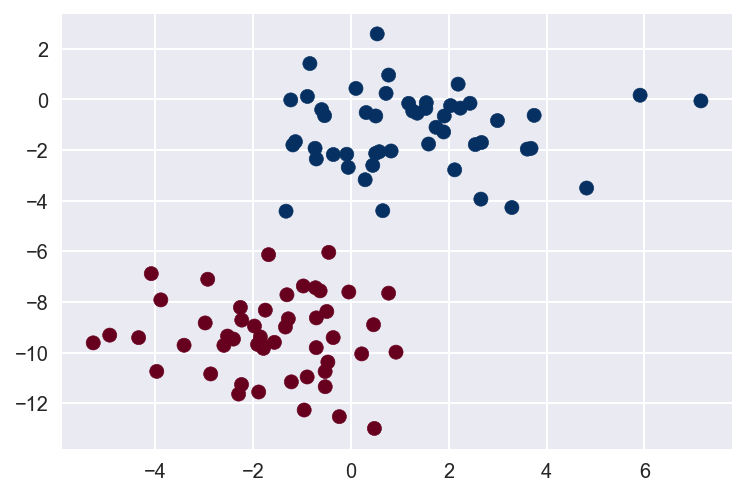

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.show()

In [8]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y)
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)


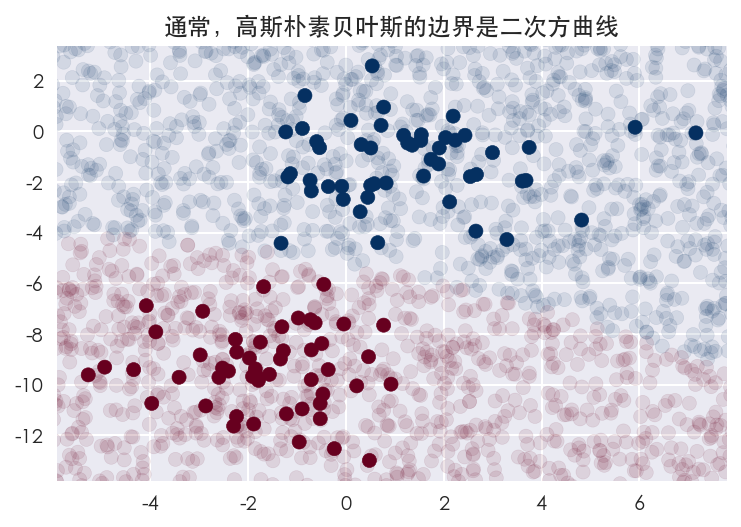

In [12]:
plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='RdBu', alpha=0.1)
plt.axis(lim)
plt.title('通常，高斯朴素贝叶斯的边界是二次方曲线')
plt.show()

In [15]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## 多项式朴素贝叶斯

In [16]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

In [17]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']

In [20]:
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [33]:
model.fit(train.data,train.target)
labels = model.predict(test.data)

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test.target,labels)
print(cm)

[[344  13  32   0]
 [  6 364  24   0]
 [  1   5 392   0]
 [  4  12 187  48]]


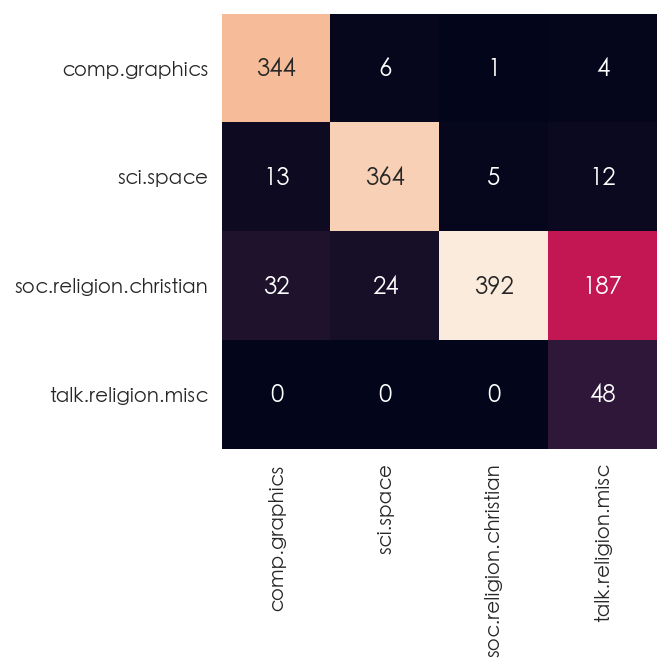

In [43]:
sns.heatmap(cm.T, fmt='d', square=True, annot=True, cbar=False, xticklabels=train.target_names,
            yticklabels=train.target_names)


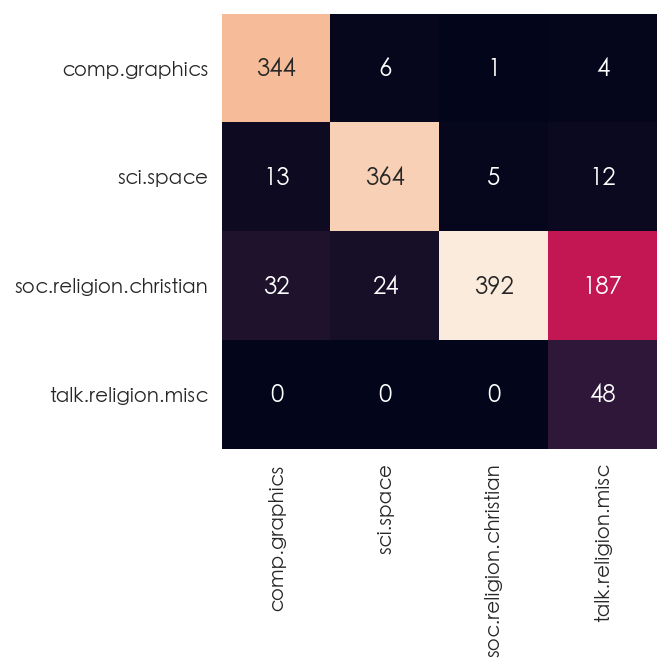